In [19]:
import joblib 
from sklearn.ensemble import RandomForestClassifier
from evaluation import evaluate_classification
from sklearn.model_selection import RandomizedSearchCV


In [20]:

# Load the preprocessed data
data = joblib.load('data/preprocessed_data.pkl')

X_train_resampled = data['X_train_resampled']
y_train_resampled = data['y_train_resampled']
X_test = data['X_test_scaled']
y_test = data['y_test']


In [4]:
# param_grid={
#     'n_estimators':[50,100],
#     # 'max_depth':[10,20,None]
# }

In [5]:
# rf_model=RandomForestClassifier(random_state=42)#the verbose=2 setting in scikit-learn models like Random Forest will show the progress of the training process, including details such as the completion of each tree in the forest

In [6]:
# random_search = RandomizedSearchCV(
#     rf_model, 
#     param_distributions=param_grid, 
#     n_iter=5, 
#     cv=3, 
#     n_jobs=-1, 
#     verbose=2, 
#     scoring='recall',  # Optimize for recall
#     random_state=42
# )

# # Fit the RandomizedSearchCV
# random_search.fit(X_train_resampled, y_train_resampled)

# # Get the best model and evaluate
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # Get the best parameters and best score
# print(f"Best Parameters: {random_search.best_params_}")
# print(f"Best Recall Score: {random_search.best_score_}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits


Best Parameters: {'n_estimators': 100, 'max_depth': None}


Best Recall Score: 1.0

In [3]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42,verbose=2)#the verbose=2 setting in scikit-learn models like Random Forest will show the progress of the training process, including details such as the completion of each tree in the forest

rf_model.fit(X_train_resampled,y_train_resampled)

y_train_pred=rf_model.predict(X_train_resampled)
y_test_pred=rf_model.predict(X_test)

print("Random Forest")
print(f"Training Metrics:")
metrics = evaluate_classification(y_train_resampled, y_train_pred)  
print(metrics)
for key,value in metrics.items():
    print(f"{key}:{value}")

# Evaluation for testing data
print(f"\nTesting Metrics:")
metrics = evaluate_classification(y_test, y_test_pred)  
for key,value in metrics.items():
    print(f"{key}:{value}")


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  6.4min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


Random Forest
Training Metrics:
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'ROC-AUC Score': np.float64(1.0), 'Confusion Matrix': array([[227451,      0],
       [     0, 227451]])}
Accuracy:1.0
Precision:1.0
Recall:1.0
F1 Score:1.0
ROC-AUC Score:1.0
Confusion Matrix:[[227451      0]
 [     0 227451]]

Testing Metrics:
Accuracy:0.9994908886626171
Precision:0.9353344046504162
Recall:0.9131597912096747
F1 Score:0.9239562780523485
ROC-AUC Score:0.9131597912096746
Confusion Matrix:[[56852    12]
 [   17    81]]


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


Text(0.5, 1.0, 'Train vs. Test ROC (SMOTE + RF)')

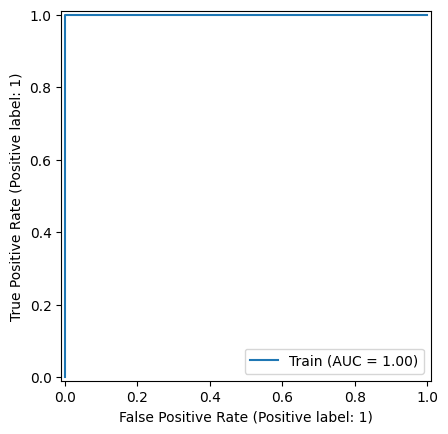

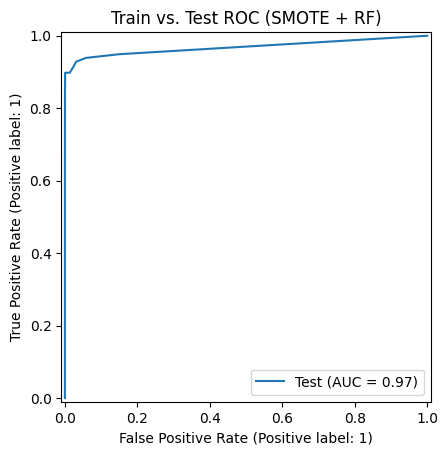

In [5]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt 

# Train
RocCurveDisplay.from_estimator(rf_model, X_train_resampled, y_train_resampled, name="Train")

# Test
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Test")
plt.title("Train vs. Test ROC (SMOTE + RF)")

In [8]:
# Save the model
joblib.dump(rf_model, 'random_forest_model.joblib')



['random_forest_model.joblib']

In [9]:
# Load the model later for predictions
loaded_model = joblib.load('random_forest_model.joblib')
y_pred= loaded_model.predict(X_test)  # Assuming X_test is your test data
metrics = evaluate_classification(y_test, y_pred)  
for key,value in metrics.items():
    print(f"{key}:{value}")

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


Accuracy:0.9994908886626171
Precision:0.9353344046504162
Recall:0.9131597912096747
F1 Score:0.9239562780523485
ROC-AUC Score:0.9131597912096746
Confusion Matrix:[[56852    12]
 [   17    81]]
